## Imports

In [1]:
## Basic libraries
import numpy as np
import pandas as pd

## Graphs and visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Import data and checks

In [2]:
## Create pandas dataframe from data
Titanic_DF = pd.read_csv("titanic.csv")

In [3]:
## Display top 10 data points 
Titanic_DF.head(10)

,survived,sex,age,Siblings_Spouses,Parents_children,pclass
0,yes,female,29.0000,0,0,first
1,yes,male,0.9167,1,2,first
2,no,female,2.0000,1,2,first
3,no,male,30.0000,1,2,first
4,no,female,25.0000,1,2,first
5,yes,male,48.0000,0,0,first
6,yes,female,63.0000,1,0,first
7,no,male,39.0000,0,0,first
8,yes,female,53.0000,2,0,first
9,no,male,71.0000,0,0,first


In [4]:
## Check for null values
Titanic_DF.isnull().sum()

survived            0
sex                 0
age                 0
Siblings_Spouses    0
Parents_children    0
pclass              0
dtype: int64

In [5]:
## Convert survived values
## For survived = "yes" we assign 1 and 0 for "no"
Titanic_DF["survived"] = Titanic_DF["survived"].map({"yes": 1, "no": 0}) 

In [6]:
## Check encoded survived values
Titanic_DF["survived"].head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [7]:
## Display passenger deaths per class feature
## Groupby pclass then sum the amount of survived passengers per class
Survived_per_Class = Titanic_DF.groupby("pclass")["survived"].sum()
print(Survived_per_Class)

pclass
first     181
second    115
third     131
Name: survived, dtype: int64


In [8]:
## Display total passengers
## Groupby pclass and the count the total amount of values (obtain total)
total_passenger_group = Titanic_DF.groupby("pclass")["survived"].count()
print(total_passenger_group)

pclass
first     284
second    261
third     501
Name: survived, dtype: int64


In [9]:
## Display deaths per class
## Subtract survivor amount from total passengers per class
Deaths_per_Class = total_passenger_group - Survived_per_Class
print(Deaths_per_Class)

pclass
first     103
second    146
third     370
Name: survived, dtype: int64


In [10]:
## Get pclass names into a list for future graphs/plots
p_class_names = Titanic_DF['pclass'].unique().tolist()

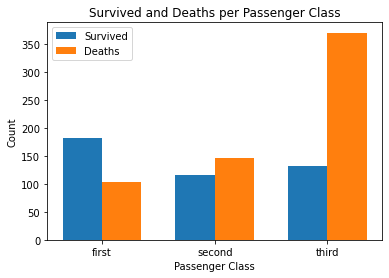

In [22]:
# Set positions and width for the bars
bar_width = 0.35
index = np.arange(len(p_class_names))

# Create bar plots
plt.bar(p_class_names, Survived_per_Class, bar_width, label="Survived")
plt.bar(index + bar_width, Deaths_per_Class, bar_width, label="Deaths")

# Adjust labels
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survived and Deaths per Passenger Class")
plt.xticks(index + bar_width / 2, p_class_names) 
plt.legend()

# Show plot
plt.show()

The data suggests a large amount of passengers died from the third class in comparison to the others. This could indicate preference towards the first and second class passengers for life boats etc. We also observe the largest survival from the first class. Comparibly, more third class passengers survived over second class passengers. This observation could be due to the larger total passenger count in third class

## Gender split 

In [23]:
## Group data by sex and passenger class. Then sum the total amount of survived passengers
survived_gender_grouped = Titanic_DF.groupby(["sex","pclass"])["survived"].sum()

In [24]:
## Display survivors based on sex and age in each class
survived_gender_grouped

sex     pclass
female  first     128
        second     92
        third      72
male    first      53
        second     23
        third      59
Name: survived, dtype: int64

The aggregation data indicates more women were survived the Titanic accident, further justifying preference to life saving aid to women. The larger survival rate for women is observed for all classes in comparison to male individuals 

In [25]:
## Get total gender population within each class
## Group by sex and class, take survivors and count all elements 
total_gender_grouped = Titanic_DF.groupby(["sex","pclass"])["survived"].count()

In [27]:
## Display total gender count per class
total_gender_grouped

sex     pclass
female  first     133
        second    103
        third     152
male    first     151
        second    158
        third     349
Name: survived, dtype: int64

## Age per class

In [28]:
## Obtain unique age values in first class
## First filter passenger class values == "first"
## Take age column and use unique method to obtain unique values
first_class_ages = Titanic_DF[Titanic_DF["pclass"] == "first"]["age"].unique()
## Display list of all first class ages
print(first_class_ages)

[29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.     50.     32.     36.
 37.     42.     19.     35.     28.     45.     40.     58.     22.
 41.     44.     59.     60.     33.     17.     11.     14.     49.
 76.     46.     27.     64.     55.     70.     38.     51.     31.
  4.     54.     23.     43.     52.     16.     32.5    21.     15.
 65.     28.5    45.5    56.     13.     61.     34.      6.     57.
 62.     67.    ]


In [29]:
## Obtain age count for pclass
## Filter classes == "first"
## Group by age, and use size method to find the amount of the same rows (age) in the groupby
first_class_ages_count = Titanic_DF[Titanic_DF["pclass"] == "first"].groupby("age").size()
## Display count per age in first class
print(first_class_ages_count)

age
0.9167     1
2.0000     1
4.0000     1
6.0000     1
11.0000    1
          ..
67.0000    1
70.0000    1
71.0000    2
76.0000    1
80.0000    1
Length: 65, dtype: int64


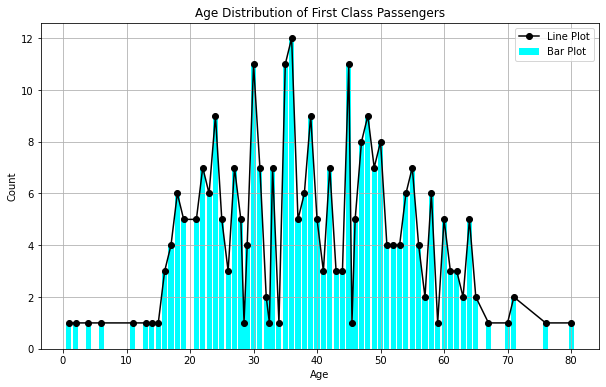

In [30]:
# Convert to list for graph/plots
first_class_ages = first_class_ages_count.index.tolist()
age_counts_list = first_class_ages_count.tolist()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(first_class_ages, age_counts_list, color="cyan", label="Bar Plot")

# Line plot
ax.plot(first_class_ages, age_counts_list, marker="o", color="black", label="Line Plot")

# Add labels, title, and grid
ax.set_title('Age Distribution of First Class Passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()
plt.show()

In [31]:
## Creating bins
bin_edges = [-1,20,40,60,80]

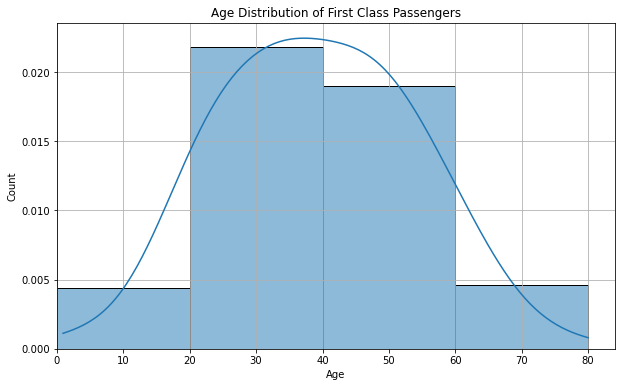

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with distribution 
sns.histplot(
    Titanic_DF[Titanic_DF["pclass"] == "first"]["age"],  # Data for histogram
    bins=bin_edges, # Bin Edges
    kde=True,  #density plot
    kde_kws={"bw_adjust": 1.4},  # Set Bandwidth
    stat="density" # Normalise hist
)

# Add labels, title, and grid
ax.set_title("Age Distribution of First Class Passengers")
ax.set_xlim(0)  # Start x-axis at 0
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.grid(True)
# Show the plot
plt.show()

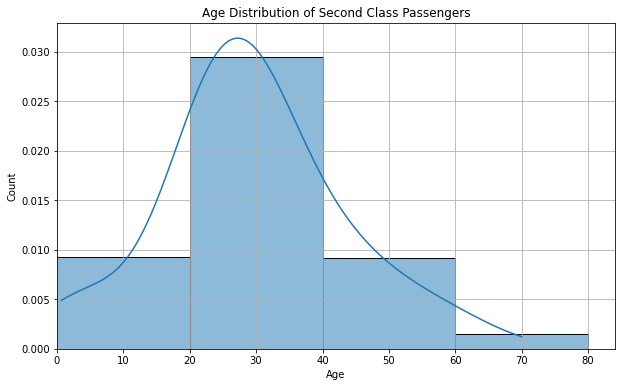

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with distribution 
sns.histplot(
    Titanic_DF[Titanic_DF["pclass"] == "second"]["age"],  # Data for histogram
    bins=bin_edges,          # Bin Edges
    kde=True,               # density plot
    kde_kws={"bw_adjust": 1.4},  # Set Bandwidth
    stat="density" # Normalise hist
)

# Add labels, title, and grid
ax.set_title("Age Distribution of Second Class Passengers")
ax.set_xlim(0)  # Start x-axis at 0
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.grid(True)

# Show the plot
plt.show()

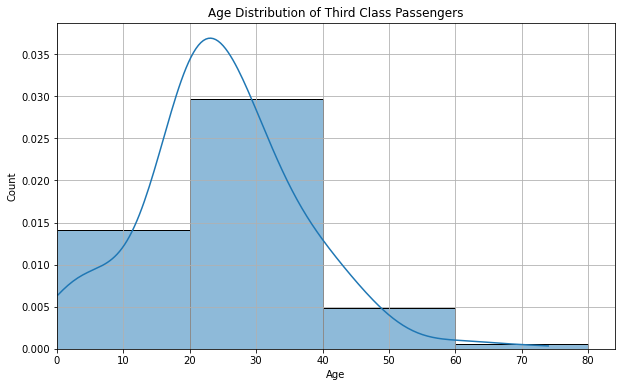

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with distribution 
sns.histplot(
    Titanic_DF[Titanic_DF["pclass"] == "third"]["age"],  # Data for histogram
    bins=bin_edges, # Bin Edges
    kde=True, # density plot
    kde_kws={"bw_adjust": 1.4},  # Set Bandwidth
    stat="density" # Normalise hist
)

# Add labels, title, and grid
ax.set_title("Age Distribution of Third Class Passengers")
ax.set_xlim(0)  # Start x-axis at 0
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.grid(True)

# Show the plot
plt.show()

## Below was a check against the figure in the document

In [38]:
## Male Age Distribution in Third Class

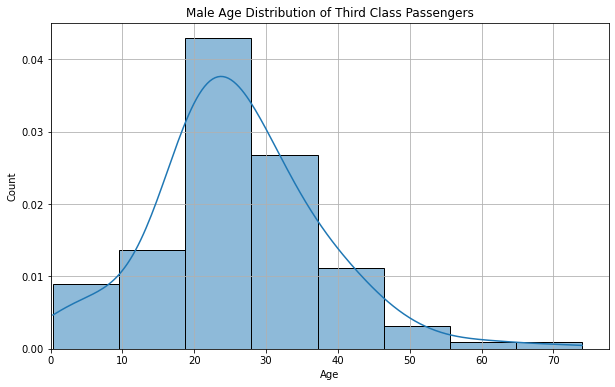

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with distribution
sns.histplot(
    Titanic_DF[(Titanic_DF["pclass"] == "third") & (Titanic_DF["sex"] == "male")]["age"],  # Data for histogram
    bins=8,   # Bin edges
    kde=True, # Density plot
    kde_kws={"bw_adjust": 1.4},  # Set Bandwidth
    stat="density" # Normalise hist
)

# Add labels, title, and grid
ax.set_title("Male Age Distribution of Third Class Passengers")
ax.set_xlim(0)  # Start x-axis at 0
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.grid(True)

# Show the plot
plt.show()

A right tailed distribution indicates a higher probability of younger men within the sample distribution i.e. less older men above ~50 in the third class. We can attribute this trend to several factors. For example, older men were more likely to have better financial wealth and could afford first or second class tickets. We can also attribute cheaper tickets to families due to the total price. Older men are less likely to travel with older family members in third class. The graph below further shows the larger amount of men above 50 in first class

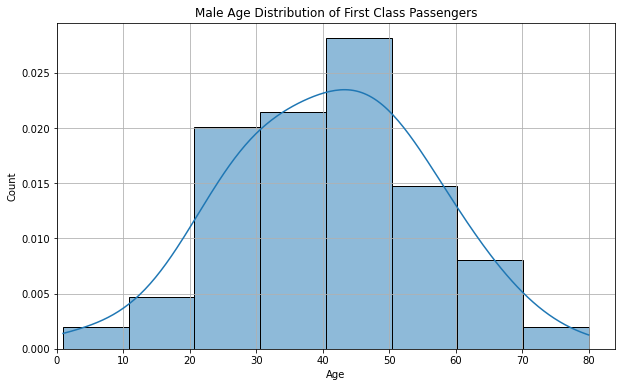

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram with distribution
sns.histplot(
    Titanic_DF[(Titanic_DF["pclass"] == "first") & (Titanic_DF["sex"] == "male")]["age"],  # Data for histogram
    bins=8,   # Bin edges
    kde=True, # Density plot
    kde_kws={"bw_adjust": 1.4},  # Set Bandwidth
    stat="density" # Normalise hist
)

# Add labels, title, and grid
ax.set_title("Male Age Distribution of First Class Passengers")
ax.set_xlim(0)  # Start x-axis at 0
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.grid(True)

# Show the plot
plt.show()